# EDA(basic stats & distribution)
- we conducted EDA to gain better understanding of the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
reviews = pd.read_csv('../assets/reviews_200p_cleaned.csv')
titles = pd.read_csv('../assets/titles_200p_cleaned.csv')
users = pd.read_csv('../assets/users_200p_cleaned.csv')
tags = pd.read_csv('../assets/tags_200p.csv')

In [4]:
reviews.head(2)

,review_id,title_id,title_english,title_romaji,user_id,score,rating,ratingCount,text_summary,text_body,lang,text_body_cleaned,text_body_cleaned_token
0,2791,30002,Berserk,Berserk,127937,85,23,53,This would be the first time i try tackling a ...,"Alrightee alrightee alrightee, here is my bers...",en,Alrightee alrightee alrightee berserk review f...,"['berserk', 'review', 'first', 'review', 'real..."
1,3811,30002,Berserk,Berserk,118781,100,191,208,One person's thoughts on one man's masterpiece.,This review contains spoilers.\n\nWhen one thi...,en,This review contains spoilers When one thinks ...,"['review', 'contains', 'spoilers', 'one', 'thi..."


In [5]:
titles.head(2)

,title_id,title_english,title_romaji,type,duration,start_year,chapters,volume,publishing_status,country,...,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller,title_romaji_type,synopsis_cleaned,synopsis_source,synopsis_wc,synopsis_cleaned_token
0,30002,Berserk,Berserk,MANGA,NaN,1989.0,NaN,NaN,RELEASING,JP,...,0,0,0,0,0,Berserk_MANGA,His name Guts Black Swordsman feared warrior s...,Dark Horse,425,"['name', 'feared', 'warrior', 'spoken', 'whisp..."
1,31706,NaN,JoJo no Kimyou na Bouken: Steel Ball Run,MANGA,NaN,2004.0,95.0,24.0,FINISHED,JP,...,0,0,1,1,0,JoJo no Kimyou na Bouken: Steel Ball Run_MANGA,Originally presented unrelated story series la...,Wikipedia,346,"['presented', 'unrelated', 'story', 'series', ..."


In [6]:
users.head(2)

,user_id,about,avatar,about_lang,about_cleaned,about_cleaned_token
0,1,Admin of this site and AniChart.net.\n\n__I no...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Admin site AniChart net I longer handle data c...,"['site', 'net', 'longer', 'handle', 'data', 'c..."
1,2,__he/him â¢ Lead Community Mod & Developer__\...,https://s4.anilist.co/file/anilistcdn/user/ava...,en,Lead Community Mod Developer I watch anime ins...,"['watch', 'anime', 'instead', 'working', 'http..."


In [93]:
tags_groupby = tags.groupby('title_id').agg({'tag_name':list}).reset_index()
tags_groupby.head(2)

,title_id,tag_name
0,1,"[Space, Crime, Episodic, Ensemble Cast, Primar..."
1,5,"[Terrorism, Primarily Adult Cast, Martial Arts..."


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

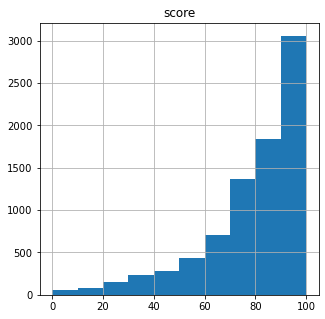

In [83]:
# review score distribution
reviews[['score']].hist(figsize =(5,5))

In [84]:
reviews[['score']].describe()

,score
count,8221.000000
mean,77.410656
std,20.896150
min,0.000000
25%,70.000000
50%,82.000000
75%,92.000000
max,100.000000


<AxesSubplot:>

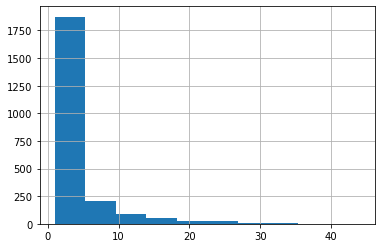

In [85]:
# title x number of reviews distribution
reviews.groupby('title_romaji')['review_id'].count().sort_values(ascending = False).hist()

<AxesSubplot:>

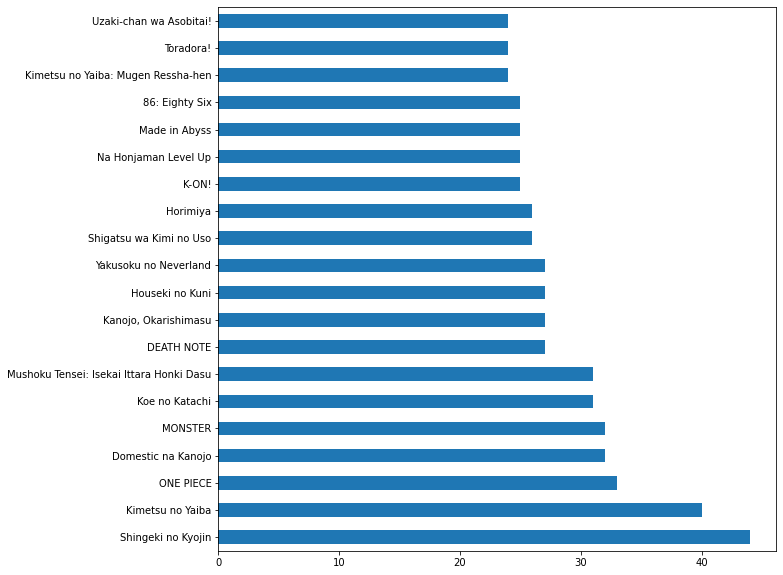

In [11]:
reviews['title_romaji'].value_counts()[:20].plot(kind = 'barh', figsize = (10,10))


<AxesSubplot:>

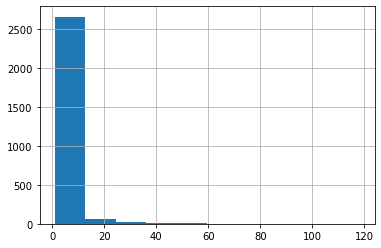

In [12]:
# user x number of reviews distribution
reviews[~reviews.user_id.str.contains(r'[a-zA-Z]+')].groupby('user_id')['review_id'].count().hist()

<AxesSubplot:>

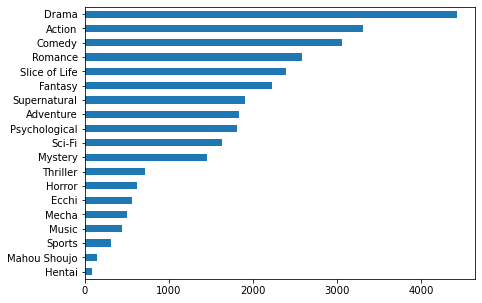

In [13]:
#the number of reviews each genre received
reviews.merge(titles[['title_id'] + titles.columns[34:-5].tolist()], how = 'left', on = 'title_id'
             )[titles.columns[34:-5]].sum().sort_values().plot(kind = 'barh', figsize = (7,5))

<AxesSubplot:>

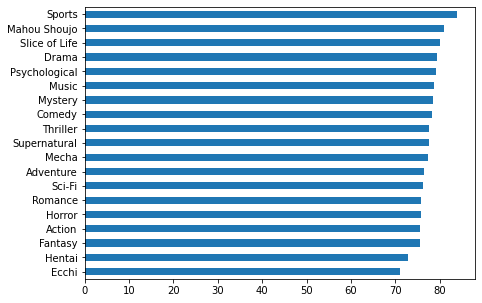

In [14]:
# average score by genre

genres = titles.columns[34:-5].tolist()
_df = reviews.merge(titles[['title_id'] + titles.columns[34:-5].tolist()], how = 'left', on = 'title_id')

genre_rating = {}
for genre in genres:
    genre_rating[genre] = _df.loc[lambda x : x[genre] == 1]['score'].mean()
    
pd.Series(genre_rating).sort_values().plot(kind = 'barh', figsize = (7,5))

<AxesSubplot:>

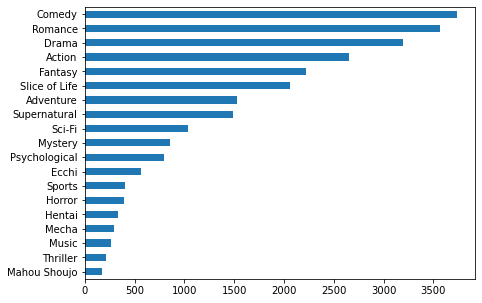

In [15]:
# distribution of genre
titles[titles.columns[34:-5].tolist()].sum().sort_values().plot(kind = 'barh', figsize = (7,5))

<AxesSubplot:>

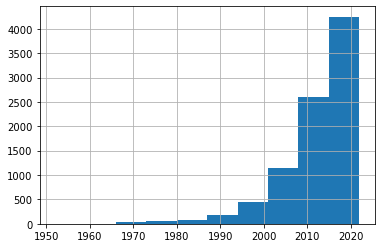

In [16]:
# distribution of the start year of the titles
titles['start_year'].hist()

<AxesSubplot:>

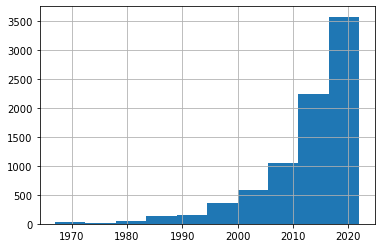

In [17]:
reviews.merge(titles[['title_id','start_year']], how = 'left', on = 'title_id')['start_year'].hist()

In [18]:
titles[['title_id','title_romaji','average_score','mean_score','popularity','favorites']]

,title_id,title_romaji,average_score,mean_score,popularity,favorites
0,30002,Berserk,93,93,116265,21566
1,31706,JoJo no Kimyou na Bouken: Steel Ball Run,92,92,52855,10653
2,114129,Gintama: THE FINAL,92,92,23496,1804
3,30013,ONE PIECE,91,91,111361,22854
4,124194,Fruits Basket: The Final,91,91,92307,7018
...,...,...,...,...,...,...
8781,68111,Chimoguri Ringo to Kingyobachi Otoko,64,67,1563,16
8782,110337,"Onii-chan, Asa made Zutto Gyutte Shite!",64,66,1913,31
8783,86018,Katappashi Kara Zenbu Koi,64,68,845,4
8784,103948,WiSH VOYAGE,64,69,622,2


array([[<AxesSubplot:title={'center':'average_score'}>,
        <AxesSubplot:title={'center':'mean_score'}>],
       [<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'favorites'}>]], dtype=object)

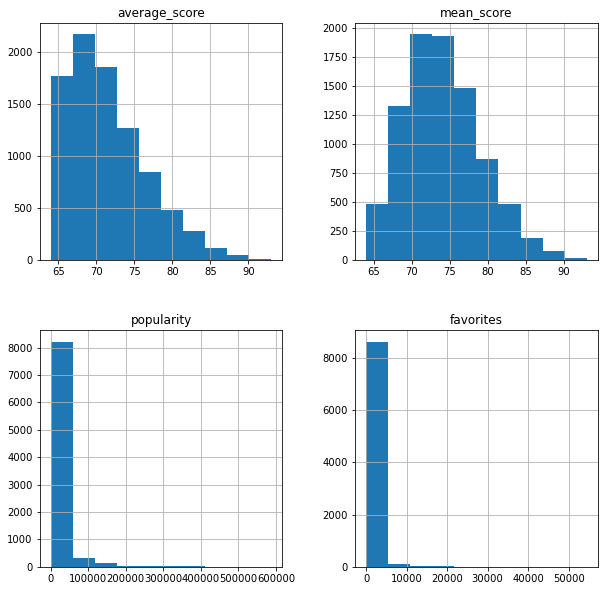

In [19]:
titles[['average_score','mean_score','popularity','favorites']].hist(figsize = (10,10))

# Basic content-based filtering algorithm
We have used two basic approaches for building basic content-based filtering systems
- correlation matrix of title-feature matrix
- correlation matrix of title-latent factor matrix (using truncated SVD)

Features used are following:
- genres of titles
- tfidf vectorized synopsis (dimension reduced to 100)
- tfidf vectorized tags

In [22]:
#pip install nltk

In [23]:
# importing packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

In [29]:
# nltk.download('punkt')
# nltk.download('wordnet')
#nltk.download('omw-1.4')

In [26]:
def tokenizer(sent):
    stemmer = SnowballStemmer(language = "english")
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sent)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [30]:
# check tokenizer
tokenizer(titles.synopsis_cleaned.iloc[0])[:20]

['his',
 'name',
 'gut',
 'black',
 'swordsman',
 'fear',
 'warrior',
 'spoken',
 'whisper',
 'bearer',
 'gigant',
 'sword',
 'iron',
 'hand',
 'scar',
 'countless',
 'battl',
 'tortur',
 'flesh',
 'also']

In [31]:
# to deal with missing data
titles.synopsis_cleaned.loc[lambda x : x.isna()] = ''

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
# building a tfidf vector for the synopsis data
tfidf = TfidfVectorizer(tokenizer = tokenizer, ngram_range = (1,3), max_features = 10000)
tfidf_tokens = tfidf.fit_transform(titles.synopsis_cleaned)

In [33]:
tfidf_tokens

<8786x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 371344 stored elements in Compressed Sparse Row format>

In [34]:
# checking out the chosen tokens for the title 'Berserk'
np.where(tfidf_tokens.toarray()[0] != 0)

(array([ 112,  293,  394,  421,  422,  723,  741,  899, 1021, 1109, 1528,
        1653, 1697, 1741, 1767, 1775, 1846, 2104, 2138, 2288, 2295, 2371,
        2659, 2682, 2865, 2887, 2897, 2908, 3192, 3424, 3467, 3736, 3738,
        4217, 4698, 4757, 5220, 5693, 6165, 6349, 6783, 6910, 7171, 7272,
        7998, 8363, 8366, 8370, 8414, 8590, 8940, 9375, 9497, 9607]),)

In [35]:
np.array(tfidf.get_feature_names())[np.where(tfidf_tokens.toarray()[0] != 0)] # pretty dark stuff

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['accompani', 'also', 'annoy', 'anyon', 'anyon els', 'battl',
       'bearer', 'black', 'brand', 'but', 'companion', 'countless',
       'crimson', 'cut', 'damn', 'dark', 'death', 'doom', 'draw', 'elf',
       'els', 'enough', 'fate', 'fear', 'flesh', 'follow', 'foolish',
       'forc', 'gigant', 'gut', 'hand', 'his', 'his name', 'iron', 'lead',
       'lie', 'mark', 'name', 'oppos', 'path', 'rank', 'relentless',
       'sacrific', 'scar', 'spoken', 'sword', 'swordsman', 'symbol',
       'take', 'the', 'tortur', 'vengeanc', 'warrior', 'whisper'],
      dtype='<U27')

In [36]:
# since the tfidf matrix is too sparce, we will reduce the dimension of the tfidf vector to 100. 
pca = PCA(n_components = 100, random_state = 42)
tfidf_tokens_pca = pca.fit_transform(tfidf_tokens.toarray())
tfidf_tokens_pca.shape

(8786, 100)

In [94]:
# now let's move on to creating a tfidf vector for tags of the titles

tags_groupby.head()

,title_id,tag_name
0,1,"[Space, Crime, Episodic, Ensemble Cast, Primar..."
1,5,"[Terrorism, Primarily Adult Cast, Martial Arts..."
2,6,"[Guns, Fugitive, Philosophy, Male Protagonist,..."
3,7,"[Female Protagonist, Witch, Magic, Police, Con..."
4,15,"[American Football, Shounen, Male Protagonist,..."


In [95]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer = identity_tokenizer, lowercase = False)
tfidf_tags = tfidf.fit_transform(tags_groupby.tag_name)

In [97]:
# checking out the tags for the title 'Berserk'

np.array(tfidf.get_feature_names())[np.where(tfidf_tags.toarray()[0] != 0)] # Makes sense

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['Amnesia', 'Anti-Hero', 'Crime', 'Cult', 'Cyberpunk', 'Cyborg',
       'Drugs', 'Ensemble Cast', 'Episodic', 'Gambling', 'Gender Bending',
       'Guns', 'LGBTQ+ Themes', 'Male Protagonist', 'Martial Arts',
       'Noir', 'Philosophy', 'Police', 'Primarily Adult Cast', 'Space',
       'Tanned Skin', 'Terrorism', 'Tragedy', 'Transgender', 'Travel',
       'Yakuza'], dtype='<U28')

In [144]:
# matching title_id with vectorized tags
tag_features = titles[['title_id']].merge(pd.concat([tags_groupby[['title_id']], pd.DataFrame(tfidf_tags.toarray())], axis = 1),
                           how = 'left',
                           on = 'title_id').drop('title_id', axis = 1)
print(tag_features.shape)
tag_features.head()

(8786, 329)


,0,1,2,3,4,5,6,7,8,9,...,319,320,321,322,323,324,325,326,327,328
0,0.0,0.0,0.192609,0.0,0.193102,0.0,0.000000,0.000000,0.181806,0.0,...,0.185892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.277371,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.145106,0.0,0.145477,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151944
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.207328,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [105]:
# combine genre, synopsis, tag to create title-feature matrix
title_features = pd.concat([titles[genres], pd.DataFrame(tfidf_tokens_pca), tag_features], axis = 1)
title_features.index = titles['title_romaji']
title_features.head()

,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Hentai,Horror,Mahou Shoujo,Mecha,...,319,320,321,322,323,324,325,326,327,328
title_romaji,,,,,,,,,,,,,,,,,,,,,
Berserk,1,1,0,1,0,1,0,1,0,0,...,0.185892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
JoJo no Kimyou na Bouken: Steel Ball Run,1,1,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Gintama: THE FINAL,1,0,1,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
ONE PIECE,1,1,1,0,0,1,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151944
Fruits Basket: The Final,0,0,1,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [106]:
# create a simple correlation matrix
title_corr = title_features.T.corr()

In [107]:
title_corr.head()

title_romaji,Berserk,JoJo no Kimyou na Bouken: Steel Ball Run,Gintama: THE FINAL,ONE PIECE,Fruits Basket: The Final,Vagabond,Gintama°,MONSTER,Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,Kaguya-sama wa Kokurasetai: Ultra Romantic,...,Gakuen de Jikan yo Tomare,Kira Kira,.hack//G.U.+,.hack//Tasogare no Udewa Densetsu,Kakumei no Hi,Chimoguri Ringo to Kingyobachi Otoko,"Onii-chan, Asa made Zutto Gyutte Shite!",Katappashi Kara Zenbu Koi,WiSH VOYAGE,Maydare Tensei Monogatari: Kono Sekai de Ichiban Warui Majo
title_romaji,,,,,,,,,,,,,,,,,,,,,
Berserk,1.000000,0.433787,0.334833,0.526858,0.278919,0.580138,0.337119,0.357240,0.723619,0.154227,...,-0.008990,-0.017570,0.363988,0.314632,0.166133,0.265839,-0.030639,-0.026372,-0.014683,0.458231
JoJo no Kimyou na Bouken: Steel Ball Run,0.433787,1.000000,0.335229,0.364199,0.269234,0.569903,0.344328,0.351972,0.541643,-0.020239,...,-0.015149,-0.015935,0.173695,0.145451,0.182125,0.422459,-0.026850,-0.022677,0.018760,0.282099
Gintama: THE FINAL,0.334833,0.335229,1.000000,0.410223,0.328901,0.475233,0.898897,0.203773,0.420750,0.200070,...,-0.025799,-0.013453,0.430275,0.380827,0.421655,0.339845,-0.023960,0.229268,-0.013313,0.343010
ONE PIECE,0.526858,0.364199,0.410223,1.000000,0.146501,0.453880,0.410718,0.009642,0.645112,0.172777,...,-0.021377,-0.021240,0.426389,0.586089,0.191846,0.317840,-0.031533,0.228435,-0.020635,0.523157
Fruits Basket: The Final,0.278919,0.269234,0.328901,0.146501,1.000000,0.168975,0.329056,0.346576,0.169748,0.685557,...,-0.008367,-0.017363,-0.023918,0.143625,0.588989,0.553147,-0.027128,0.424320,-0.018305,0.461033


In [108]:
# to check sanity, filter out less popular titles
popular_title = titles.loc[lambda x : x.popularity > 10000].title_romaji.tolist()

In [150]:
# Let's check the performance of the first content-based filtering system

title_corr_popular = title_corr[popular_title]
title_corr_popular.loc['Berserk'].drop_duplicates().sort_values(ascending = False)[:20].to_frame()
# For the title 'Berserk', the system pushed out some titles that give off 'dark' vibes, 
# such as 'Akame ga Kill' or 'Devilman'

,Berserk
title_romaji,
Berserk,1.000000
Akame ga Kill!,0.822371
Akame ga Kill!,0.799917
Devilman,0.796158
Berserk: Ougon Jidaihen III - Kourin,0.766439
Berserk: Ougon Jidaihen II - Doldrey Kouryaku,0.762965
Made in Abyss: Fukaki Tamashii no Reimei,0.762721
Kenpuu Denki Berserk,0.758370
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,0.733131


In [151]:
title_corr_popular.loc['JoJo no Kimyou na Bouken: Steel Ball Run'].drop_duplicates().sort_values(ascending = False)[:20].to_frame()

,JoJo no Kimyou na Bouken: Steel Ball Run
title_romaji,
JoJo no Kimyou na Bouken: Steel Ball Run,1.000000
JoJo no Kimyou na Bouken: Ougon no Kaze,0.825779
JoJo no Kimyou na Bouken: Ougon no Kaze,0.824303
JoJo no Kimyou na Bouken: Diamond wa Kudakenai,0.805052
JoJo no Kimyou na Bouken: JoJolion,0.746688
Kimetsu no Yaiba: Mugen Ressha-hen,0.742495
JoJo no Kimyou na Bouken: Stardust Crusaders,0.738438
Kimetsu no Yaiba: Mugen Ressha-hen (TV),0.728153
Modao Zushi 2,0.725033


In [152]:
title_corr_popular.loc['Boku no Hero Academia'].drop_duplicates().iloc[0].sort_values(ascending = False)[:20].to_frame()

,Boku no Hero Academia
title_romaji,
Boku no Hero Academia,1.000000
Boku no Hero Academia,1.000000
Hagane no Renkinjutsushi,0.845031
Hagane no Renkinjutsushi,0.845031
Hagane no Renkinjutsushi: Milos no Seinaru Hoshi,0.840241
ONE PIECE,0.839331
ONE PIECE,0.839331
Magi,0.837369
ONE PIECE: Heart of Gold,0.823236


In [153]:
title_corr_popular.loc['Kidou Senshi Gundam Thunderbolt'].drop_duplicates().iloc[0].sort_values(ascending = False)[:20].to_frame()

,Kidou Senshi Gundam Thunderbolt
title_romaji,
Kidou Senshi Gundam Thunderbolt,1.000000
Aldnoah.Zero 2,0.887382
Kidou Senshi Gundam: THE ORIGIN,0.857570
Code Geass: Boukoku no Akito Saishuushou - Itoshiki Mono-tachi e,0.849682
Code Geass: Boukoku no Akito 3 - Kagayakumono Ten Yori Otsu,0.849478
Code Geass: Boukoku no Akito 4 - Nikushimi no Kioku Kara,0.847971
Code Geass: Boukoku no Akito 2 - Hikisakareshi Yokuryuu,0.835359
Kidou Senshi Gundam Thunderbolt,0.822199
Code Geass: Boukoku no Akito 1 - Yokuryuu wa Maiorita,0.818297


In [154]:
title_corr_popular.loc['Re:Zero kara Hajimeru Isekai Seikatsu'].drop_duplicates().iloc[0].sort_values(ascending = False)[:20].to_frame()

,Re:Zero kara Hajimeru Isekai Seikatsu
title_romaji,
Re:Zero kara Hajimeru Isekai Seikatsu,1.000000
Re:Zero kara Hajimeru Isekai Seikatsu,1.000000
Re:Zero kara Hajimeru Isekai Seikatsu,0.946538
Re:Zero kara Hajimeru Isekai Seikatsu,0.946538
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2,0.939198
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,0.876598
Akame ga Kill!,0.756036
Akame ga Kill!,0.756036
Fushigi Yuugi,0.722816


In [123]:
# now let us apply some more complicated approach, that is utilizing title - latent factor matrix
# to achieve the matrix, we will use truncated SVD method

from sklearn.decomposition import TruncatedSVD

n_topics = 50
lsi = TruncatedSVD(n_components=n_topics, random_state=0)

reduced_term_matrix = lsi.fit_transform(title_features.fillna(0))
sig = np.diag(lsi.singular_values_)

print(reduced_term_matrix.shape)
print(sig.shape)
print(lsi.components_.shape)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(8786, 50)
(50, 50)
(50, 448)


In [124]:
# now that we have title - latent factor matrix, we can create a correlation matrix out of it
latent_mat = pd.DataFrame(reduced_term_matrix, index = titles['title_romaji'])
latent_corr = latent_mat.T.corr()

In [125]:
# to check sanity, filter out less popular titles
latent_corr_popular = latent_corr[popular_title]

In [146]:
# Let's check the performance 

latent_corr_popular.loc['Berserk'].drop_duplicates().sort_values(ascending = False)[:20].to_frame()
# For the title 'Berserk', the system pushed out similar titles as the first system
# 'Akame ga Kill!' and 'Devilman' scored the highest

,Berserk
title_romaji,
Berserk,1.000000
Akame ga Kill!,0.898765
Devilman,0.881755
Akame ga Kill!,0.875878
Made in Abyss: Fukaki Tamashii no Reimei,0.836178
Kenpuu Denki Berserk,0.831759
Berserk: Ougon Jidaihen III - Kourin,0.828126
Berserk: Ougon Jidaihen II - Doldrey Kouryaku,0.821727
Hagane no Renkinjutsushi: FULLMETAL ALCHEMIST,0.811938


In [147]:
latent_corr_popular.loc['JoJo no Kimyou na Bouken: Steel Ball Run'].drop_duplicates().sort_values(ascending = False)[:20].to_frame()

,JoJo no Kimyou na Bouken: Steel Ball Run
title_romaji,
JoJo no Kimyou na Bouken: Steel Ball Run,1.000000
JoJo no Kimyou na Bouken: Ougon no Kaze,0.911105
JoJo no Kimyou na Bouken: Ougon no Kaze,0.907300
JoJo no Kimyou na Bouken: Diamond wa Kudakenai,0.901373
Modao Zushi,0.826644
JoJo no Kimyou na Bouken: JoJolion,0.825633
Kimetsu no Yaiba: Mugen Ressha-hen,0.825292
Modao Zushi 2,0.823459
JoJo no Kimyou na Bouken: Stardust Crusaders - Egypt-hen,0.821205


In [148]:
latent_corr_popular.loc['Boku no Hero Academia'].iloc[0].sort_values(ascending = False)[:20].to_frame()

,Boku no Hero Academia
title_romaji,
Boku no Hero Academia,1.000000
Boku no Hero Academia,1.000000
ONE PIECE,0.986282
ONE PIECE,0.986282
Hagane no Renkinjutsushi,0.976900
Hagane no Renkinjutsushi,0.976900
Magi,0.973791
ONE PIECE FILM: GOLD,0.969691
ONE PIECE: Heart of Gold,0.966623


In [149]:
latent_corr_popular.loc['Re:Zero kara Hajimeru Isekai Seikatsu'].iloc[0].drop_duplicates().sort_values(ascending = False)[:20].to_frame()

,Re:Zero kara Hajimeru Isekai Seikatsu
title_romaji,
Re:Zero kara Hajimeru Isekai Seikatsu,1.000000
Re:Zero kara Hajimeru Isekai Seikatsu,0.993758
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2,0.991049
Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season,0.913655
Akame ga Kill!,0.828535
Fushigi Yuugi,0.812705
JIN-ROH,0.811894
BANANA FISH,0.810344
No Game No Life Zero,0.808384


# Evaluating the systems